In [8]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from shapely.geometry import Point
import geopandas as gpd
from geodatasets import get_path
from pyproj import CRS

import warnings
warnings.filterwarnings('ignore')


C:\Users\AJIKA ANGELO\anaconda23\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [9]:
#loading the dataset
ds = pd.ExcelFile('Climate_Data_RF_&_Temp_2012_to_2018.xlsx')

In [10]:
#Loading the MONTHLY RAINFALL TOTALS (mm) data
Rain_df = pd.read_excel(ds,sheet_name='Rainfall',header=1)
Rain_df


,Station,LON,LAT,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ANNUAL,AVERAGE
0,Kitgum,32.8830,3.300,2012,0.00,0.90,8.70,267.60,110.00,84.70,140.00,175.60,161.6,220.1,63.1,30.3,1262.60,105.216667
1,Lira,32.9000,2.250,2012,0.00,7.40,23.90,319.50,135.50,86.30,99.70,255.30,278.9,196.1,147.8,93.6,1644.00,137.000000
2,Kasese,30.1000,0.183,2012,0.70,22.80,18.50,302.80,124.10,13.80,22.90,36.60,51.3,276.9,93.2,123.1,1086.70,90.558333
3,Gulu,32.2830,2.783,2012,0.00,13.60,10.00,217.00,218.80,201.40,106.00,198.60,401.7,214.7,111.4,52.6,1745.80,145.483333
4,Arua,30.9170,3.050,2012,0.00,4.30,18.30,142.80,110.80,109.10,355.50,181.70,226.0,336.7,56.4,47.2,1588.80,132.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Mubende,31.3666,0.580,2018,7.73,72.50,194.88,125.25,134.52,40.36,36.03,51.96,92.9,142.2,71.2,173.8,1143.33,95.277500
129,Kibanda,31.2200,-0.520,2018,28.30,71.60,121.50,186.40,67.80,23.60,0.60,42.50,48.2,88.3,142.0,165.6,986.40,82.200000
130,Buginyanya,34.3670,1.283,2018,22.30,41.20,464.90,371.00,295.70,325.40,151.90,166.70,243.6,167.5,79.4,38.2,2367.80,197.316667
131,Kyembogo,30.3330,0.683,2018,18.40,48.53,177.93,183.00,125.40,124.80,49.80,0.00,155.6,177.3,211.8,153.8,1426.36,118.863333


In [11]:
Rain_df.columns

Index(['Station', 'LON', 'LAT', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'ANNUAL', 'AVERAGE'],
      dtype='object')

<Axes: >

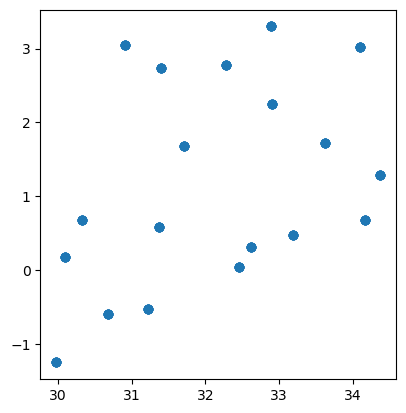

In [12]:
# Load Uganda's boundary data
#uganda_boundary = gpd.read_file('C:\\Users\\AJIKA ANGELO\\Desktop\\ML\\Project\\data\\Uganda_districts2010.shp')

# Convert Rain_df to a GeoDataFrame
Rain_gdf = gpd.GeoDataFrame(Rain_df, geometry=gpd.points_from_xy(Rain_df.LON, Rain_df.LAT))

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()


# Plot rainfall data
Rain_gdf.plot(ax=ax)


In [13]:
Rain_gdf.head()

,Station,LON,LAT,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ANNUAL,AVERAGE,geometry
0,Kitgum,32.883,3.300,2012,0.0,0.9,8.7,267.6,110.0,84.7,140.0,175.6,161.6,220.1,63.1,30.3,1262.6,105.216667,POINT (32.88300 3.30000)
1,Lira,32.900,2.250,2012,0.0,7.4,23.9,319.5,135.5,86.3,99.7,255.3,278.9,196.1,147.8,93.6,1644.0,137.000000,POINT (32.90000 2.25000)
2,Kasese,30.100,0.183,2012,0.7,22.8,18.5,302.8,124.1,13.8,22.9,36.6,51.3,276.9,93.2,123.1,1086.7,90.558333,POINT (30.10000 0.18300)
3,Gulu,32.283,2.783,2012,0.0,13.6,10.0,217.0,218.8,201.4,106.0,198.6,401.7,214.7,111.4,52.6,1745.8,145.483333,POINT (32.28300 2.78300)
4,Arua,30.917,3.050,2012,0.0,4.3,18.3,142.8,110.8,109.1,355.5,181.7,226.0,336.7,56.4,47.2,1588.8,132.400000,POINT (30.91700 3.05000)


In [14]:
Rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Station  133 non-null    object 
 1   LON      133 non-null    float64
 2   LAT      133 non-null    float64
 3   Year     133 non-null    int64  
 4   Jan      133 non-null    float64
 5   Feb      133 non-null    float64
 6   Mar      133 non-null    float64
 7   Apr      132 non-null    float64
 8   May      133 non-null    float64
 9   Jun      133 non-null    float64
 10  Jul      133 non-null    float64
 11  Aug      133 non-null    float64
 12  Sep      133 non-null    float64
 13  Oct      133 non-null    float64
 14  Nov      133 non-null    float64
 15  Dec      133 non-null    float64
 16  ANNUAL   133 non-null    float64
 17  AVERAGE  133 non-null    float64
dtypes: float64(16), int64(1), object(1)
memory usage: 18.8+ KB


In [15]:
Rain_df.describe()

,LON,LAT,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ANNUAL,AVERAGE
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,32.120347,1.179330,2015.000000,24.395865,37.193534,114.339474,184.242652,145.300977,91.822105,85.757970,122.525414,139.419323,154.627820,137.857293,66.954812,1303.051955,108.587663
std,1.372355,1.350487,2.007561,30.445162,35.699565,71.177294,78.100326,82.894330,66.998661,75.207438,79.463195,74.190691,81.749935,72.659114,70.063618,408.082857,34.006905
min,29.983000,-1.250000,2012.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.200000,45.850000
25%,30.917000,0.183000,2013.000000,0.700000,11.000000,70.600000,129.250000,86.500000,36.600000,26.000000,60.600000,97.100000,94.200000,96.300000,16.700000,1043.080000,86.923333
50%,32.283000,0.683000,2015.000000,12.600000,28.000000,108.600000,171.750000,130.000000,84.700000,66.500000,108.200000,133.500000,138.500000,131.200000,44.400000,1278.000000,106.500000
75%,33.183000,2.733000,2017.000000,34.000000,52.500000,143.400000,231.000000,188.800000,133.900000,116.930000,168.900000,176.600000,199.700000,173.000000,101.500000,1499.000000,124.916667
max,34.367000,3.300000,2018.000000,131.500000,165.800000,464.900000,454.700000,442.800000,325.400000,355.500000,395.600000,401.700000,604.000000,549.200000,509.600000,3616.700000,301.391667


In [16]:
Rain_df.isnull().sum()

Station    0
LON        0
LAT        0
Year       0
Jan        0
Feb        0
Mar        0
Apr        1
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
ANNUAL     0
AVERAGE    0
dtype: int64

In [17]:
#Null value imputation for the columns
for col in Rain_df.columns:
    if Rain_df[col].isnull().sum()>0:
        val1 = Rain_df[col].mean()
        Rain_df[col] = Rain_df[col].fillna(val1)
print(f"Rainfall: {Rain_df.isnull().sum().sum()}")

Rainfall: 0


In [129]:
unique_stations = data['Station'].unique()
print(unique_stations)
print("Number of unique stations:", len(unique_stations))

['Kitgum ' 'Kasese ' 'Soroti ' 'Jinja ' 'Mbarara' 'Kabale' 'Kotido'
 'Kibanda' 'Wadelai' 'Arua' 'Masindi ' 'Tororo ' 'Mubende' 'Kyembogo'
 'Lira' 'Gulu' 'Entebbe ' 'Kampala']
Number of unique stations: 18


In [131]:
#Cleaning
# Remove leading and trailing spaces from the 'Station' column
data['Station'] = data['Station'].str.strip()
unique_stations = data['Station'].unique()

print("Unique stations after removing spaces:")
print(unique_stations)
print("Number of unique stations:", len(unique_stations))

Unique stations after removing spaces:
['Kitgum' 'Kasese' 'Soroti' 'Jinja' 'Mbarara' 'Kabale' 'Kotido' 'Kibanda'
 'Wadelai' 'Arua' 'Masindi' 'Tororo' 'Mubende' 'Kyembogo' 'Lira' 'Gulu'
 'Entebbe' 'Kampala']
Number of unique stations: 18


### EDA

In [1]:
#EDA Profile report
from ydata_profiling import ProfileReport
ProfileReport(Rain_df, title="Report")

NameError: name 'Rain_df' is not defined

In [19]:
features = list(Rain_df.select_dtypes(include=np.number).columns)
features.remove('LON')
features.remove('LAT')
print(features)

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'ANNUAL', 'AVERAGE']


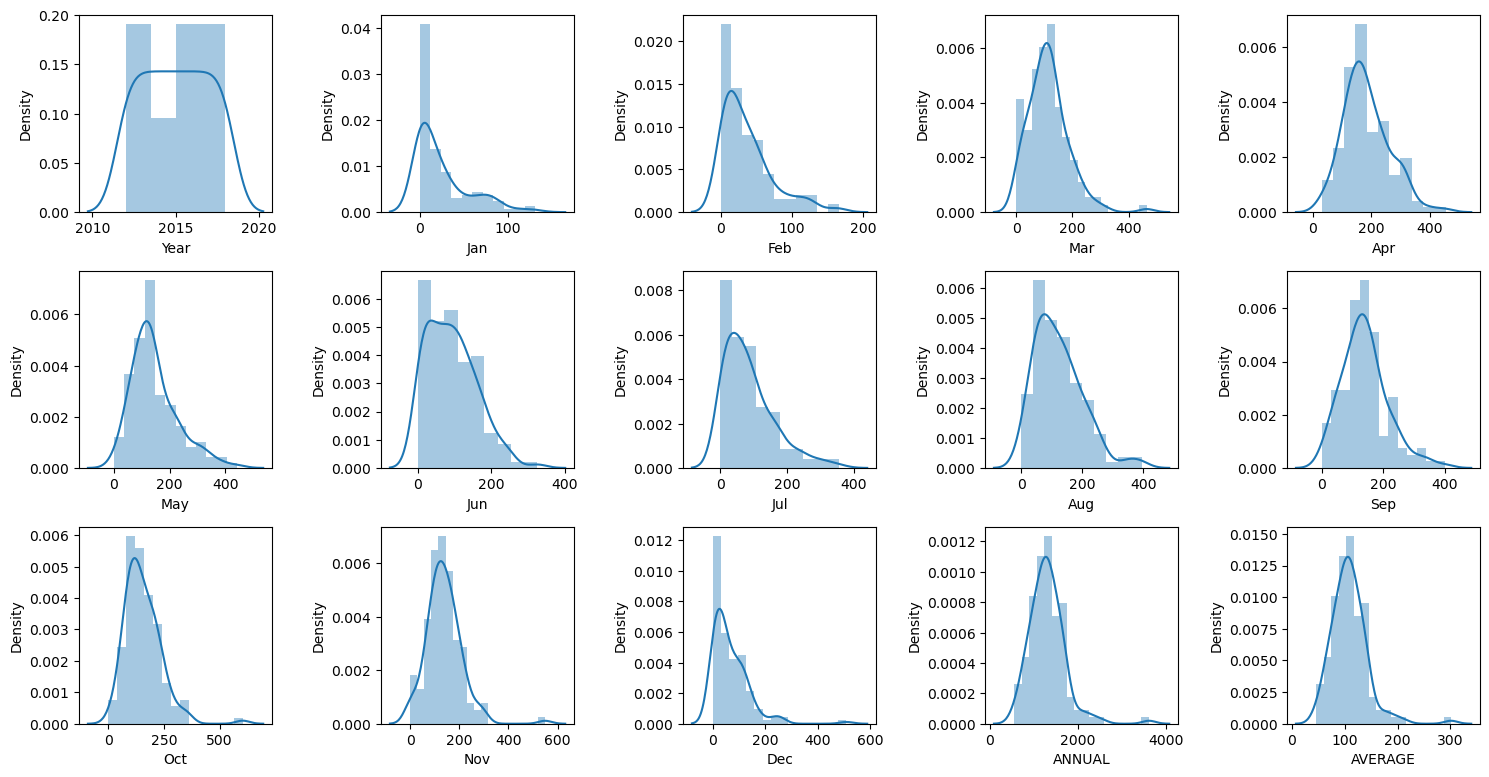

In [20]:
plt.subplots(figsize=(15,10))
for i, col in enumerate(features):
    plt.subplot(4,5, i+1)
    sb.distplot(Rain_df[col])
    
plt.tight_layout()
plt.show()

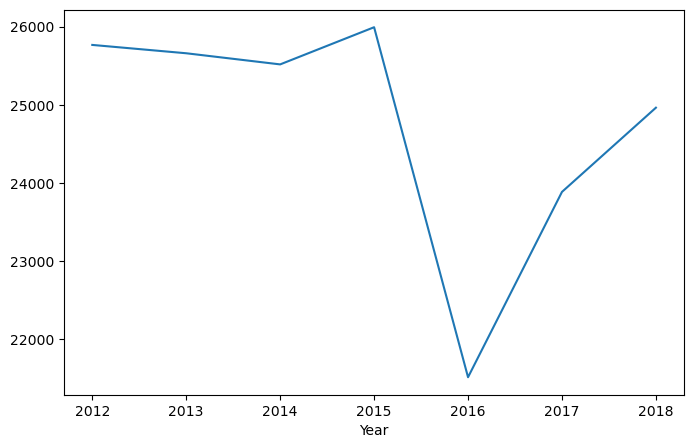

In [21]:
Rain_df.groupby("Year").sum()['ANNUAL'].plot(figsize=(8,5));

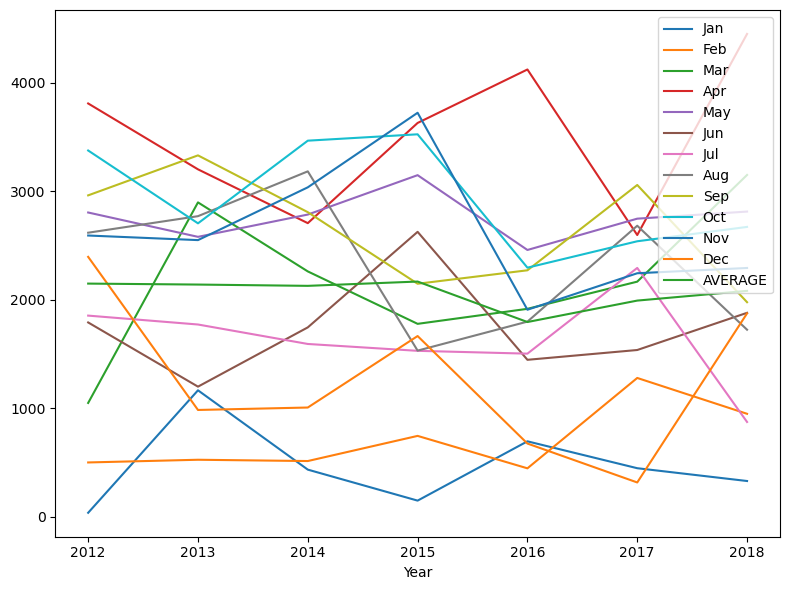

In [22]:
Rain_df[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'AVERAGE']].groupby('Year').sum().plot(figsize=(8, 6))
plt.tight_layout()
plt.show()

<Axes: ylabel='Station'>

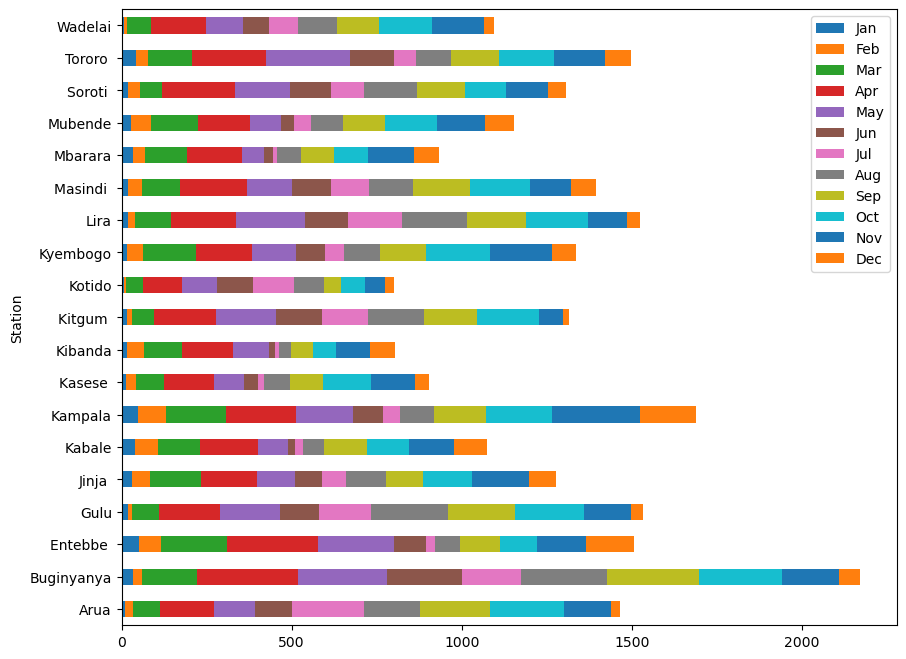

In [23]:
Rain_df[['Station', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].groupby('Station').mean().plot.barh(stacked=True,figsize=(10,8))

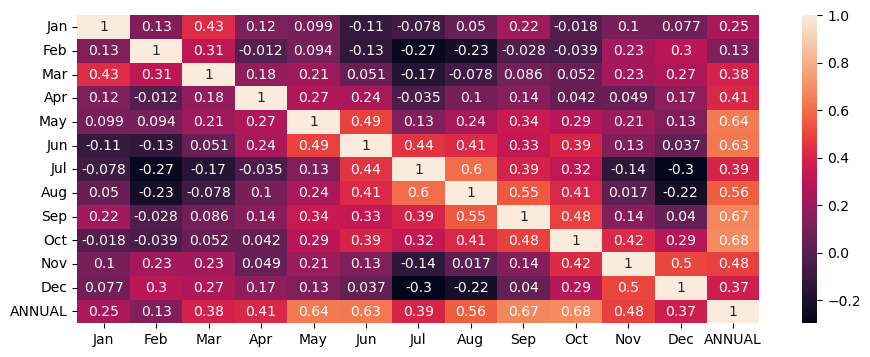

In [25]:
plt.figure(figsize=(11,4))
sb.heatmap(Rain_df[['Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'ANNUAL']].corr(),annot=True)
plt.show()

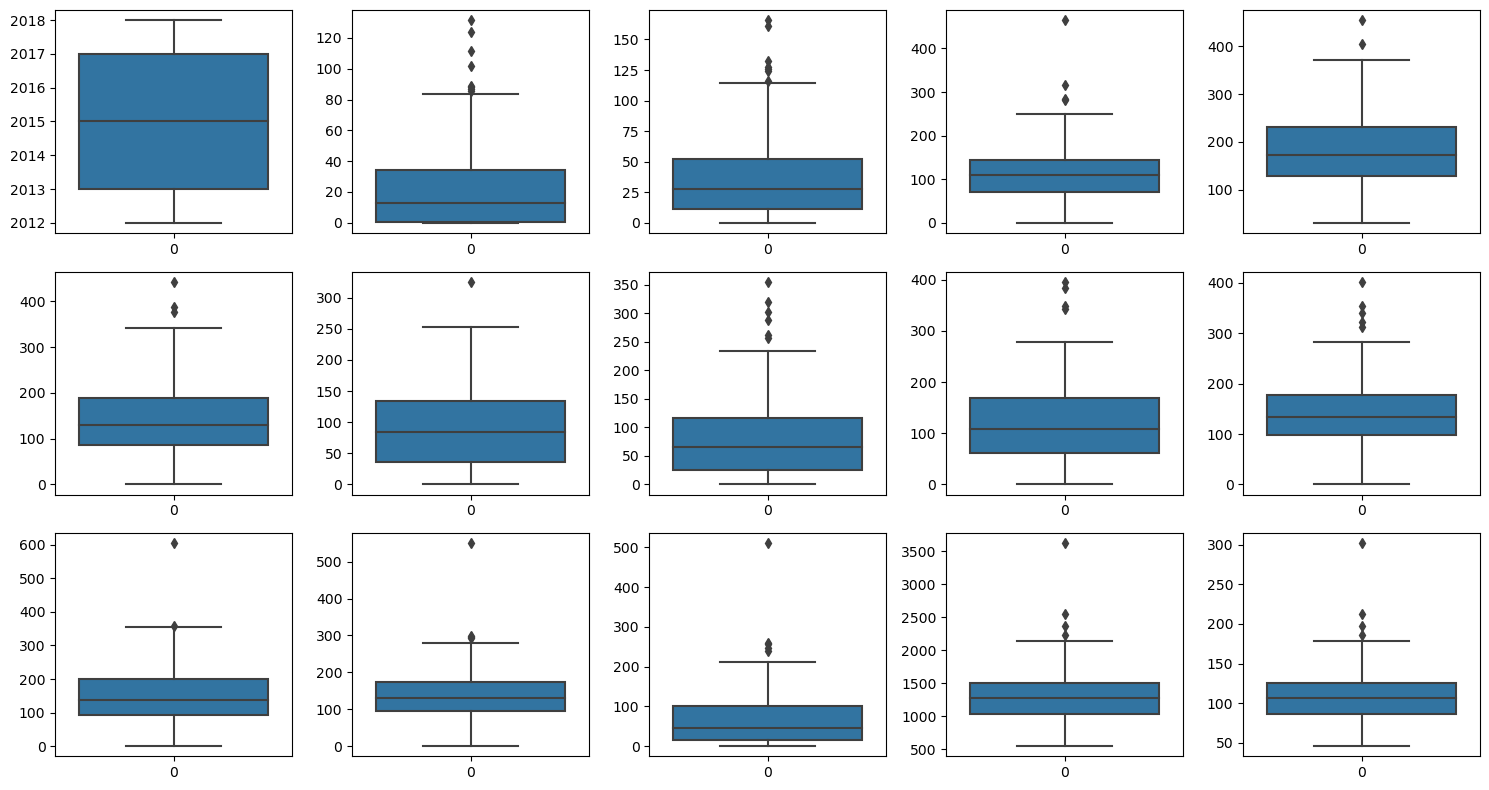

In [29]:
#Box plots to detect outliers present in the data
plt.subplots(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(3,5, i+1)
    sb.boxplot(Rain_df[col])
plt.tight_layout()
plt.show()

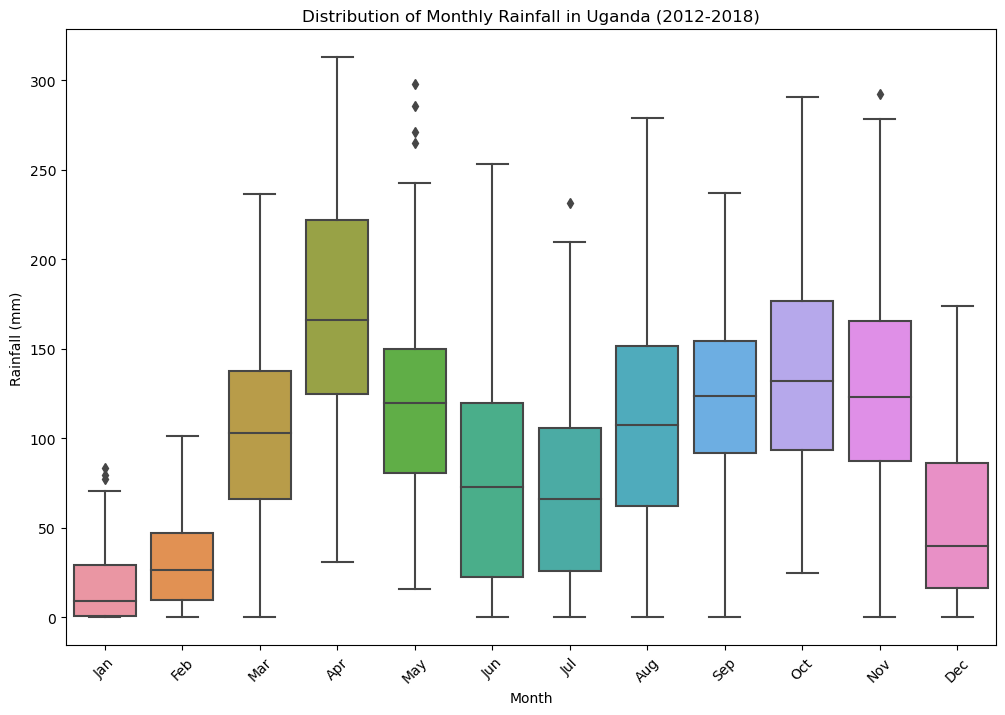

In [30]:
# List of all months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Empty DataFrame to hold rows without outliers
df_without_outliers = Rain_df.copy()

for month in months:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_without_outliers[month].quantile(0.25)
    Q3 = df_without_outliers[month].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define boundaries
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    
    # Filter out outliers for the current month
    mask = (df_without_outliers[month] >= lower_boundary) & (df_without_outliers[month] <= upper_boundary)
    df_without_outliers = df_without_outliers[mask]
    
# Setting the plot size
plt.figure(figsize=(12, 8))

# Melting the DataFrame to have a long-form DataFrame, suitable for sns.boxplot
df_melted = pd.melt(df_without_outliers, id_vars=['Year'], value_vars=months, var_name='Month', value_name='Rainfall')

# Creating a box plot
sb.boxplot(x='Month', y='Rainfall', data=df_melted)

plt.title('Distribution of Monthly Rainfall in Uganda (2012-2018)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


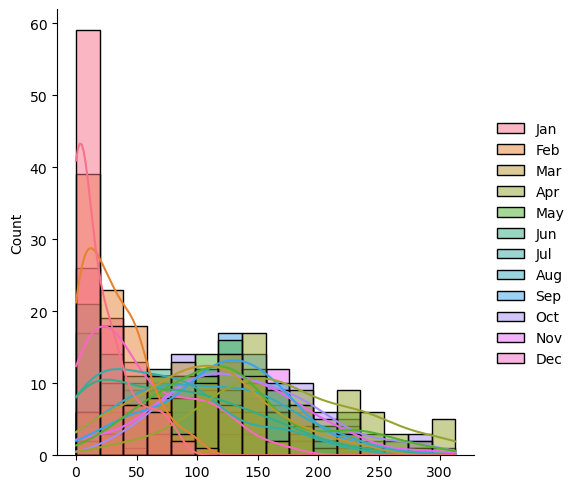

In [31]:
sb.displot(df_without_outliers[months],kde=True)
plt.show()

In [32]:
data = df_without_outliers
data

,Station,LON,LAT,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ANNUAL,AVERAGE
0,Kitgum,32.8830,3.300,2012,0.00,0.90,8.70,267.60,110.00,84.70,140.00,175.60,161.6,220.1,63.1,30.3,1262.60,105.216667
2,Kasese,30.1000,0.183,2012,0.70,22.80,18.50,302.80,124.10,13.80,22.90,36.60,51.3,276.9,93.2,123.1,1086.70,90.558333
6,Soroti,33.6170,1.717,2012,0.00,3.30,9.80,304.80,130.10,105.40,141.40,207.00,180.2,62.7,122.8,107.4,1374.90,114.575000
8,Jinja,33.1830,0.470,2012,6.40,71.90,138.50,107.90,81.00,155.40,98.20,170.70,71.0,142.2,142.8,140.7,1326.70,110.558333
9,Mbarara,30.6830,-0.600,2012,1.00,42.40,44.60,208.20,132.20,21.80,34.30,130.20,139.2,156.4,158.5,111.3,1180.10,98.341667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kotido,34.1000,3.017,2018,0.00,3.10,139.66,155.60,157.80,116.80,63.83,35.63,12.8,107.5,2.6,21.5,816.82,68.068333
128,Mubende,31.3666,0.580,2018,7.73,72.50,194.88,125.25,134.52,40.36,36.03,51.96,92.9,142.2,71.2,173.8,1143.33,95.277500
129,Kibanda,31.2200,-0.520,2018,28.30,71.60,121.50,186.40,67.80,23.60,0.60,42.50,48.2,88.3,142.0,165.6,986.40,82.200000
131,Kyembogo,30.3330,0.683,2018,18.40,48.53,177.93,183.00,125.40,124.80,49.80,0.00,155.6,177.3,211.8,153.8,1426.36,118.863333


In [34]:
print(data.columns)

Index(['Station', 'LON', 'LAT', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'ANNUAL', 'AVERAGE'],
      dtype='object')


## Training and Testing

In [ ]:
#Separating of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

rain_data = np.asarray(data[['Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']])
X = None; y = None
for i in range(rain_data.shape[1]-3):
    if X is None:
        X = rain_data[:, i:i+3]
        y = rain_data[:, i+3]
    else:
        X = np.concatenate((X, rain_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, rain_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rain_data
X_train

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("MAE: ", mae,"\n")
print("Predictions", predictions)

MAE:  50.12052512182875 

Predictions [ 78.43754027  75.05881081  72.27873531 126.97246798 120.26313136
 124.58156338 107.47263154 119.49176924  98.86852398  98.01812384
 141.28565002  97.91829002  77.45194309  75.75128003 132.21711915
  96.06055399  93.61557515  67.65320483  99.95218604 176.61785991
 157.81230795 109.09432399 145.05342136 101.394484   123.52215124
 128.107343   104.17618087  85.67920568  88.56405448  91.59476712
 128.93930134 135.98681917  93.13334438 110.85589839 110.83714433
 104.424071    99.95847201 149.12495073 131.41950092 123.81029299
 109.27866168  92.68877884 110.13213048 150.41101546 123.03545692
 126.54946513 132.98357769  93.76415703 136.70527891  87.18962859
 111.69796275  70.41773636 109.05128634  93.74995434 128.1234087
 100.76570141 122.38979173  85.40839948  96.3519051   72.548832
  91.15359717  56.53252597  94.97033588 105.69507963 112.04759795
 125.78018536 102.37721598 127.39654265  81.69527012 128.36006036
 125.93665026 104.26665894  92.27326852 1

In [62]:
from sklearn import linear_model

reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

50.12018261389526


In [145]:
#Testing our model
year_2015 = data[['Station','Year','Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].loc[data['Year']==2015]

rain_2015 = np.asarray(year_2015[['Jan', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].loc[year_2015['Station']=='Soroti'])
X_year_2015 = None; y_year_2015 = None
for i in range(rain_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = rain_2015[:, i:i+3]
        y_year_2015 = rain_2015[:,i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, rain_2015[:,i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015,rain_2015[:,i+3]),axis=0)
        
print(rain_2015)
print(X_year_2015)
print(y_year_2015)


[[  0.    9.   26.  312.9 151.3 191.  109.5 138.7 109.9 199.  292.7  99.9]]
[[  0.    9.   26. ]
 [  9.   26.  312.9]
 [ 26.  312.9 151.3]
 [312.9 151.3 191. ]
 [151.3 191.  109.5]
 [191.  109.5 138.7]
 [109.5 138.7 109.9]
 [138.7 109.9 199. ]
 [109.9 199.  292.7]]
[312.9 151.3 191.  109.5 138.7 109.9 199.  292.7  99.9]


In [148]:
#Testing
y_year_predict_2015 = reg.predict(X_year_2015)

print(y_year_predict_2015)

[102.42763216 194.01252056  78.45580104 126.40744993  90.83588111
 118.10101295 102.26583523 138.05240819 149.94886135]
